In [151]:
import statistics

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
url='https://data.nasdaq.com/api/v3/datasets/FSE/AFX_X'
r=requests.get(url)
json_data=json.loads(r.text)

In [3]:
print(type(json_data))
df1=pd.DataFrame(json_data)
df2=df1.transpose()
df2=df2.reset_index()
print(df2.shape)
print(df2[['column_names']])
df2_column_names_dict=df2['column_names'].to_dict()
print(type(df2_column_names_dict))
print(df2_column_names_dict)
df2_data_dict=df2['data'].to_dict()
print(type(df2_data_dict))
#print(df2_data_dict)
df2_description_dict=df2['description'].to_dict()
print(type(df2_description_dict))
print(df2_description_dict)
dict_initial={'Date':[],'Open':[],'High':[],'Low':[],'Close':[],'Change':[],'Traded Volume':[],'Turnover':[],
              'Last Price of the Day':[],'Daily Trade Units':[],'Daily Turnover':[]}
k=0;
for i in dict_initial.keys():
    for j in range(5267):
        dict_initial[i].append(df2_data_dict[0][j][k])
    k=k+1
df=pd.DataFrame(dict_initial)
print(df.head(10))
print(df.isna())
df_cleaned=df.fillna(0)
#print(type(df_cleaned))
#print(df)
print(df_cleaned.head(10))
print(df_cleaned.shape)

<class 'dict'>
(1, 22)
                                        column_names
0  [Date, Open, High, Low, Close, Change, Traded ...
<class 'dict'>
{0: ['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']}
<class 'dict'>
<class 'dict'>
{0: 'Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704'}
         Date   Open   High    Low  Close  Change  Traded Volume  Turnover  \
0  2020-12-01  112.2  112.2  111.5  112.0     NaN           51.0    5703.0   
1  2020-11-30  111.0  113.6  111.0  112.1     NaN          315.0   35111.5   
2  2020-11-27  111.0  111.5  109.5  111.2     NaN          155.0   17168.5   
3  2020-11-26  111.3  112.0  110.5  111.6     NaN          254.0   28367.5   
4  2020-11-25  111.4  111.4  110.1  110.1     NaN          294.0   32435.8   
5  2020-11-24  116.1  116.8  110.5  113.5     NaN         3184

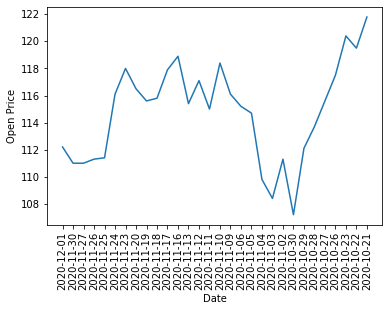

In [183]:
df_limited=df_cleaned[df_cleaned['Date']>'2020-10-20']
plt.plot(df_limited['Date'],df_limited['Open'])
plt.xticks(df_limited['Date'],rotation='90')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

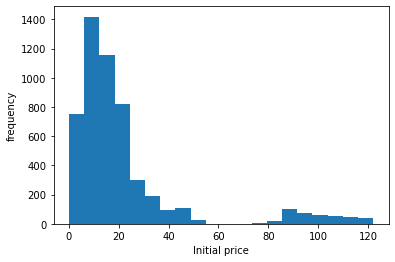

In [184]:
plt.hist(df_cleaned['Open'],bins=20)
plt.xlabel('Initial price')
plt.ylabel('frequency')
plt.show()

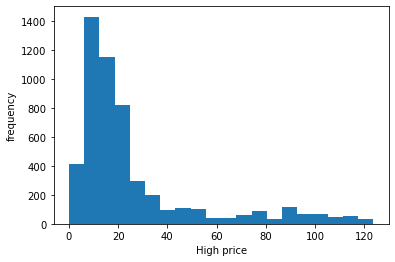

In [185]:
plt.hist(df_cleaned['High'],bins=20)
plt.xlabel('High price')
plt.ylabel('frequency')
plt.show()

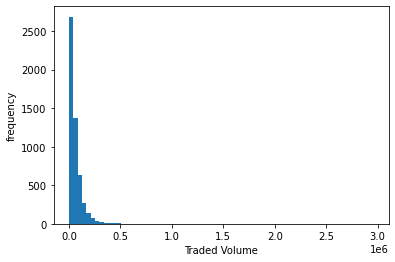

In [186]:
plt.hist(df_cleaned['Traded Volume'],bins=70)
plt.xlabel('Traded Volume')
plt.ylabel('frequency')
plt.show()

In [122]:
#Question #1
#print(df_cleaned[(df_cleaned['Date']>'2017-01-01')])
df=pd.DataFrame(dict_initial)
df_cleaned=df.fillna(0)
df_cleaned
stock_2017=df_cleaned[['Date','Open','Low','Close','Traded Volume']][(df_cleaned['Date']>'2017-01-01') & (df_cleaned['Date']<'2017-12-12')]
stock_2017

,Date,Open,Low,Close,Traded Volume
739,2017-12-11,52.28,51.26,52.14,71817.0
740,2017-12-08,51.50,51.28,52.12,109157.0
741,2017-12-07,50.89,50.81,51.47,48123.0
742,2017-12-06,50.80,50.39,50.89,88730.0
743,2017-12-05,51.21,50.40,51.25,83023.0
...,...,...,...,...,...
977,2017-01-06,34.91,34.91,35.04,27507.0
978,2017-01-05,35.02,34.73,35.06,48412.0
979,2017-01-04,35.48,34.75,35.19,54408.0
980,2017-01-03,35.90,35.34,35.48,70618.0


In [89]:
#Question#2
#I already did it in the main body of my program, but the command is here:
df1=pd.DataFrame(json_data)

In [123]:
#Question#3
stock2017_nonzero_vales=stock_2017[stock_2017['Open']>0]
print(stock2017_nonzero_vales.shape)
print(stock2017_nonzero_vales[['Open']].max())
print(stock2017_nonzero_vales[['Open']].min())

(240, 5)
Open    52.28
dtype: float64
Open    34.0
dtype: float64


In [93]:
#Question#4
df=pd.DataFrame(dict_initial)
df_cleaned=df.fillna(0)
df_cleaned
stock_difference_high_low=df_cleaned
stock_difference_high_low['Range']=stock_difference_high_low['High']-stock_difference_high_low['Low']
round(stock_difference_high_low['Range'].max(),3)

14.1

In [120]:
#Question#5
df=pd.DataFrame(dict_initial)
df_cleaned=df.fillna(0)
df_cleaned
stock_difference_close_price=df_cleaned
stock_difference_close_price['Range of Close Price']=''
for i in range(5266):
    #print(stock_difference_close_price.iloc[i+1,4],' ',stock_difference_close_price.iloc[i,4],' ',stock_difference_close_price.iloc[i+1,4]-stock_difference_close_price.iloc[i,4])
    stock_difference_close_price.iloc[i,11]=abs(stock_difference_close_price.iloc[i+1,4]-stock_difference_close_price.iloc[i,4])
stock_difference_close_price.iloc[5266,11]=stock_difference_close_price.iloc[5266,4]
print(stock_difference_close_price['Range of Close Price'].max())

38.0


In [127]:
#Question#6
print(stock_2017['Traded Volume'].mean())

88605.35390946502


In [158]:
#Question#7
list_median=[]
for i in stock_2017['Traded Volume']:
    list_median.append(i)
list_median.sort()
print(statistics.median(list_median))

74975.0
